<a href="https://colab.research.google.com/github/ucfilho/vichebling2810/blob/main/Fruta_Bexiga/frutas_bexiga_seleciona_ANN_nov_15_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# parte 1- le os arquivos e separa eles em a e b (a frutas deitadas e b sao as frusta em pe)
# parte 2- usa o filtro
# parte 3- calcula o volume : para um objeto
# parte 4- para todos objetos
# parte 5- explora tecnicas para melhorar o volume
# parte 6 - adiciona o volume falso como coluna para X tentativa de melhorar calc
# parte 7 - inicia calcular as areas
# parte 8- identica a parte 7 mas em rotina para duas orientacoes (up e down)
# parte 9 - ANN com as novas variaveis de area

In [2]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import os 
import cv2
import re, random
from skimage import feature
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import random
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [3]:
!gdown --id 1PbOf7-WA_t4FKOGkOgIi3dioOxaOr6Q_

Downloading...
From: https://drive.google.com/uc?id=1PbOf7-WA_t4FKOGkOgIi3dioOxaOr6Q_
To: /content/Bexigas.zip
100% 229M/229M [00:01<00:00, 133MB/s]


In [4]:
import zipfile
file_name = zipfile.ZipFile('Bexigas.zip', 'r')
file_name.extractall()

In [5]:
FILE='Bexigas.zip'
img_name=[]
x_original = [] 

ref ='jpg'
data_file ='xlsx'

with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
      if(name[-3:]==ref):
        img_name.append(name)
        #x_original.append(cv2.resize(cv2.imread(name),(60,80)))
        x_original.append(cv2.resize(cv2.imread(name,0),(60,80)))
      else:
        if(name[-4:] == data_file):
          df =pd.read_excel(name)


In [6]:
name_down=[]  # down representa as frutas deitadas
original_down = [] 
name_up=[] # down representa as frutas em pe
original_up= [] 

In [7]:
k = 0
for name in img_name:
  if(name[-5]=='a'):
    name_up.append(name)
    original_up.append(x_original[k])
  else:
    name_down.append(name)
    original_down.append(x_original[k])
  k = k +1


In [8]:
def get_dimension(img):
  im = img
  # Compute the Canny filter for two values of sigma
  edges1 = feature.canny(im)
  edges2 = feature.canny(im, sigma=3)
  nrows,ncols =edges2.shape
  Foto = np.ones((nrows,ncols))*255
  for i in range(nrows):
    for j in range(ncols):
      if edges2[i,j] == True:
        Foto[i,j]=0
  Foto = Foto.astype(int)
# calculo do raio horizontal
  Quadrado = []
  Raio = []
  for i in range(nrows):
    values = np.zeros(4)
    k = -1
    for j in range(1,ncols):
      if(Foto[i,j-1]==255 and Foto[i,j]==0):
        if(k<3):
          k = k+1
          values[k]=j
    L = values[3] - values[0]
    d = values[2] - values[1]
    Quadrado.append(L)
    Raio.append(d)
  L = np.array(Quadrado).max()
  Raio = np.array(Raio).max()
  medida = Raio/L*14.5
  return medida,Foto


In [9]:
def area_fruta(img):
  (rows, cols) =img.shape

  img_fruit = np.zeros(img.shape,np.uint8) 

  for i in range(rows):
    for j in range(cols):
      if(img[i,j]>100):
        img[i,j]=0


  for i in range(rows):
    for j in range(cols):
      if(img[i,j]>0):
        img[i,j]=255
        img_fruit[i,j]=255

  xi=0;xf=0;yi=0;yf=0;
  jref=int(cols/2)
  iref=int(rows/2)

  for i in range(rows):
    j = jref
    if(img[i,j]>0):
      if(xi==0):
        xi = i
      else:
        xf = i
  for j in range(cols):
    i = iref
    if(img[i,j]>0):
      if(yi==0):
        yi = j
      else:
        yf = j

  for i in range(rows):
    for j in range(cols):
      if(i > xi and i < xf and j>yi and j < yf):
        img[i,j]=255

    area = 1-np.sum(img_fruit.ravel())/np.sum(img.ravel())

  return area

In [10]:
(num,l,w)=np.array(original_down).shape

In [11]:
dimensao =[]
for i in range(num):
  lista =[]
  Ind = i
  img= original_up[Ind]
  medida1,foto = get_dimension(img)
  lista.append(medida1)
  img = img.transpose()
  medida2,foto = get_dimension(img)
  lista.append(medida2)
  img2= original_down[Ind]
  medida3,foto = get_dimension(img2)
  lista.append(medida3)
  img2 = img2.transpose()
  medida4,foto = get_dimension(img2)
  lista.append(medida4)
  dimensao.append(lista)


In [12]:
area_up =[]
area_down =[]
for i in range(num):
  lista =[]
  Ind = i
  img= original_up[Ind]
  area = area_fruta(img)
  area_up.append(area)
  img= original_down[Ind]
  area = area_fruta(img)
  area_down.append(area)

In [13]:
print(area_up)

[0.14885496183206104, 0.19602698650674666, 0.12139605462822456, 0.12443095599393017, 0.13572778827977316, 0.10839694656488552, 0.10218140068886339, 0.09938837920489296, 0.07390300230946878, 0.09337466098411473, 0.1214230471771075, 0.12259800153727907, 0.09343629343629345, 0.12634822804314327, 0.145616067979915, 0.10528345545699958, 0.06254709871891484, 0.06160954948016939, 0.0906656465187452, 0.14071510957324107, 0.048461538461538445, 0.0565819861431871, 0.08905165767154977, 0.1307037896365043, 0.07557251908396945, 0.12811660912926737, 0.09399075500770415, 0.06994619523443502, 0.1210363495746326, 0.10674373795761083, 0.13711857860177679, 0.11880046136101496, 0.08349365140438625, 0.08842752787389463, 0.05809926894959605, 0.06461538461538463, 0.08630609896432684, 0.09919261822376013, 0.13522858240491742, 0.1376811594202898, 0.04854740061162077, 0.06791301030141172, 0.09334353481254787, 0.07639419404125292, 0.09827915869980874, 0.10377718428080884, 0.06233269598470359, 0.06498470948012236

In [14]:
print(area_down)

[0.18368902439024393, 0.1741444866920152, 0.14830346930995042, 0.1428571428571429, 0.1492424242424243, 0.11362778406946017, 0.11178247734138969, 0.1145557655954631, 0.10164310278945354, 0.11816443594646275, 0.14, 0.1609627679578789, 0.11544342507645255, 0.1462585034013606, 0.1724528301886793, 0.12888551933282788, 0.08053435114503815, 0.03523554193795486, 0.09916413373860178, 0.1648351648351648, 0.03883121876201456, 0.06069919323857087, 0.09687261632341726, 0.1641961231470923, 0.06770635222518062, 0.15993964541682382, 0.06912267375617165, 0.058020477815699634, 0.14043035107587765, 0.13036868110984412, 0.17751034223392248, 0.15074798619102414, 0.09527468305801001, 0.11017274472168903, 0.0688196847366398, 0.07574598316755932, 0.10450038138825324, 0.11573720397249809, 0.15522501906941266, 0.17861205915813427, 0.06176134197483796, 0.08152380952380955, 0.10858010630220194, 0.08731966590736517, 0.12021236253318168, 0.1332828474062855, 0.0666412795125666, 0.07771428571428574, 0.127044503613541

In [15]:
def elipsoide(valores):
  dif = np.zeros(4)
  k = 0
  ref =1E99
  for i in range(2):
    for j in range(2):
      dif[k] = abs(valores[i]-valores[j+2])
      if(ref > dif[k]):
        ref = dif[k]
        ind1=i # 0,1
        ind2=j+2 # 2,3
      k = k+1
  b = (valores[ind1]+valores[ind2])/2
  if(ind1 ==0):
    a = valores[1]
  else:
    a = valores[0]
  if(ind2 ==2):
    c = valores[3]
  else:
    c = valores[2]
  Vol = 4/3*np.pi*a*b*c

  return Vol  
  

  

In [16]:
Volume = []
X =[]
for i in range(num):
  valores = dimensao[i]
  X.append(valores)
  Vol = elipsoide(valores)
  Volume.append(Vol)

In [17]:
#dimensao[0]

In [18]:
y = df['Volume'].values
#print(y)

In [19]:
X = np.array(X)
#X =np.concatenate((X,np.array(Volume).reshape(num,1)),axis=1)
X =np.concatenate((X,np.array(area_up).reshape(num,1)),axis=1)
X =np.concatenate((X,np.array(area_down).reshape(num,1)),axis=1)
y = np.array(y)
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10, shuffle=True, random_state=3)# 1

In [20]:
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X)
scaler_Y = preprocessing.MinMaxScaler((-1,1)).fit(y)

In [21]:
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_Y.transform(y_train)
y_test = scaler_Y.transform(y_test)

In [25]:
# define a rede neural 
Neurons = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
vetor_r2_treino =[]
vetor_r2_teste =[]
vetor_neuron =[]
for N_Hidden in Neurons:
  model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(N_Hidden), max_iter=1500,random_state=11 )
  model.fit(X_train, y_train)
  y_calc_train=model.predict(X_train)
  y_calc_test=model.predict(X_test)
  mse_test=mean_squared_error(y_test,y_calc_test)
  R2_test=r2_score(y_test,y_calc_test)
  mse_train=mean_squared_error(y_train,y_calc_train)
  R2_train=r2_score(y_train,y_calc_train)
  vetor_r2_teste.append(R2_test)
  vetor_r2_treino.append(R2_train)
  vetor_neuron.append(N_Hidden)
  print("Neurons",N_Hidden,"MSE treino=",mse_train,"MSE teste=",mse_test)
  print("Neurons",N_Hidden,"R^2 treino=",R2_train,"R^2 teste=",R2_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons 2 MSE treino= 0.011151858813412262 MSE teste= 0.01635367325808048
Neurons 2 R^2 treino= 0.9689790102982094 R^2 teste= 0.9219658104130453
Neurons 4 MSE treino= 0.00686766002619089 MSE teste= 0.01922450725526136
Neurons 4 R^2 treino= 0.9808963138332022 R^2 teste= 0.9082671629670962


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons 6 MSE treino= 0.0045570100277093385 MSE teste= 0.0196006578333522
Neurons 6 R^2 treino= 0.987323820763359 R^2 teste= 0.9064722998155117
Neurons 8 MSE treino= 0.0017777818850361442 MSE teste= 0.05877150296371899
Neurons 8 R^2 treino= 0.9950547658044765 R^2 teste= 0.7195622945251733


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons 10 MSE treino= 0.0007289550935218449 MSE teste= 0.06422012785635525
Neurons 10 R^2 treino= 0.9979722745035103 R^2 teste= 0.6935633020572216


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons 12 MSE treino= 0.0011872578017561944 MSE teste= 0.05134230552094589
Neurons 12 R^2 treino= 0.9966974194474777 R^2 teste= 0.7550119083568442


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons 14 MSE treino= 0.00021380231866879263 MSE teste= 0.10689597738520855
Neurons 14 R^2 treino= 0.9994052686967605 R^2 teste= 0.4899286029676193


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons 16 MSE treino= 0.00014803265679703346 MSE teste= 0.1001854914285573
Neurons 16 R^2 treino= 0.999588219363349 R^2 teste= 0.5219487690243908


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons 18 MSE treino= 0.00011819627140553027 MSE teste= 0.15293713541637996
Neurons 18 R^2 treino= 0.9996712148728379 R^2 teste= 0.2702357915784622


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons 20 MSE treino= 8.650595233900515e-05 MSE teste= 0.04935404137470117
Neurons 20 R^2 treino= 0.9997593674470282 R^2 teste= 0.764499231411947


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons 22 MSE treino= 7.151526605940027e-05 MSE teste= 0.05858966770516183
Neurons 22 R^2 treino= 0.9998010668562911 R^2 teste= 0.7204299507890546


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons 24 MSE treino= 7.491908745774017e-05 MSE teste= 0.11021672662157478
Neurons 24 R^2 treino= 0.9997915984878055 R^2 teste= 0.4740831123923873


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons 26 MSE treino= 4.724187678223371e-05 MSE teste= 0.08799370732662995
Neurons 26 R^2 treino= 0.9998685878473109 R^2 teste= 0.5801238332438583


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons 28 MSE treino= 5.5971339297574666e-05 MSE teste= 0.12122585628169716
Neurons 28 R^2 treino= 0.9998443052078585 R^2 teste= 0.42155127458886055


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons 30 MSE treino= 4.9712928601049924e-05 MSE teste= 0.09380401604584873
Neurons 30 R^2 treino= 0.9998617141525927 R^2 teste= 0.5523990080624438


Text(0, 0.5, 'coeficiente de correlacao')

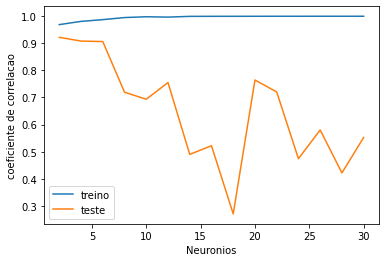

In [26]:
plt.plot(vetor_neuron,vetor_r2_treino,vetor_neuron,vetor_r2_teste)
plt.legend(['treino','teste'])
plt.xlabel('Neuronios')
plt.ylabel('coeficiente de correlacao')